In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\Shivani\OneDrive\Desktop\311nyc.csv")

C:\Users\Shivani\AppData\Local\Temp\ipykernel_3684\2338776251.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\Shivani\OneDrive\Desktop\311nyc.csv")


In [4]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
data.columns


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
data.isna().sum()


Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
data[data['Complaint Type']=='Animal in a Park']


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
283132,30427220,04/18/2015 09:44:55 AM,05-02-2015 10:35,NYPD,New York City Police Department,Animal in a Park,Animal Waste,Park,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.drop(labels=283132, axis=0, inplace=True)


In [9]:
data['Created Date']= pd.to_datetime(data['Created Date'])


In [10]:
data['Closed Date']= pd.to_datetime(data['Closed Date'])


In [11]:
data['Request_Closing_Time']= data['Closed Date'].values-data['Created Date'].values


In [12]:
data['Request_Closing_Time_mins'] = data['Request_Closing_Time']/np.timedelta64(1,'m')

In [13]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300697 entries, 0 to 300697
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300697 non-null  int64          
 1   Created Date                    300697 non-null  datetime64[ns] 
 2   Closed Date                     298533 non-null  datetime64[ns] 
 3   Agency                          300697 non-null  object         
 4   Agency Name                     300697 non-null  object         
 5   Complaint Type                  300697 non-null  object         
 6   Descriptor                      294783 non-null  object         
 7   Location Type                   300566 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

In [15]:
#Provide major insights/patterns that you can offer in a visual format (graphs or tables); 
#at least 4 major conclusions that you can come up with after generic data mining.

In [16]:
data['Complaint Type'].unique()


array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee'], dtype=object)

In [17]:
# Conclusion 1: City with maximum number of complaints was found to be Brooklyn with different types of complaints
df1=data.groupby(['City','Complaint Type']).size().unstack().fillna(0)

Text(0.5, 1.0, 'Number of complaints vs. City')

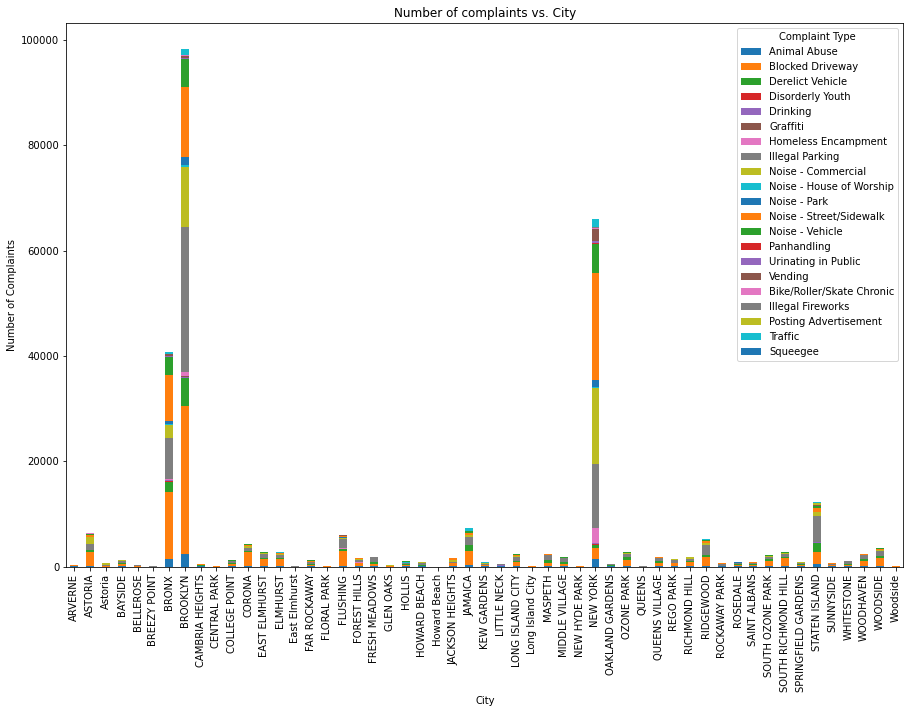

In [18]:
df1.plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('Number of complaints vs. City')

In [19]:
df2=data.groupby(['City','Status']).size().unstack().fillna(0)


In [20]:
# Conclusion 2: Based upon the status of complaints it can be inferred that maximum number of complaints were resolved.
# From the total unresolved cases the top 5 cities have been found which sum upto 76.92 % of total Open cases
df2.sort_values(by='Open', ascending=False).head() # Thus maximum pending cases are in New york

Status,Assigned,Closed,Draft,Open
City,,,,
NEW YORK,15.0,65961.0,0.0,18.0
BROOKLYN,19.0,98275.0,1.0,12.0
JAMAICA,1.0,7286.0,0.0,9.0
STATEN ISLAND,2.0,12335.0,0.0,6.0
BRONX,6.0,40690.0,1.0,5.0


In [21]:
df2['Unresolved_percentage']= df2['Open']/df2['Open'].sum()*100


In [22]:
df2.sort_values(by='Unresolved_percentage', ascending=False).head().sum()


Status
Assigned                     43.000000
Closed                   224547.000000
Draft                         2.000000
Open                         50.000000
Unresolved_percentage        76.923077
dtype: float64

[Text(0, 0, 'Illegal Parking'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Noise - Commercial'),
 Text(3, 0, 'Noise - Street/Sidewalk'),
 Text(4, 0, 'Noise - Vehicle'),
 Text(5, 0, 'Traffic'),
 Text(6, 0, 'Derelict Vehicle'),
 Text(7, 0, 'Animal Abuse'),
 Text(8, 0, 'Drinking'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Noise - Park'),
 Text(11, 0, 'Homeless Encampment'),
 Text(12, 0, 'Posting Advertisement'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Graffiti'),
 Text(15, 0, 'Noise - House of Worship'),
 Text(16, 0, 'Bike/Roller/Skate Chronic'),
 Text(17, 0, 'Urinating in Public'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks')]

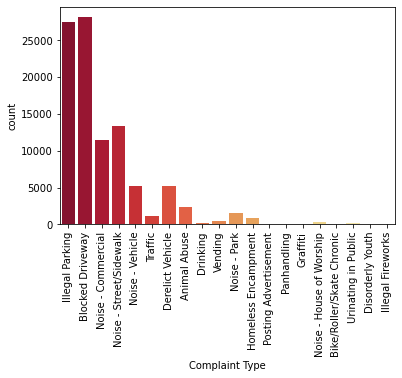

In [23]:
# Conclusion 3: Since maximum number of complaints were filed in Brooklyn, complaint data was analysed for this city.
# Blocked Driveway was found to be the most frequent complaint lodged to NYPD in the city of Brooklyn.
data.loc[(data['City']=='BROOKLYN'),:]['Complaint Type'].value_counts()
plot_3= sns.countplot(x=data.loc[data.City=='BROOKLYN']['Complaint Type'], palette='YlOrRd_r')
plot_3.set_xticklabels(plot_3.get_xticklabels(), rotation=90)

In [24]:
data['Location Type'].value_counts()


Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64

C:\Users\Shivani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Street/Sidewalk'),
 Text(1, 0, 'Club/Bar/Restaurant'),
 Text(2, 0, 'Store/Commercial'),
 Text(3, 0, 'House of Worship'),
 Text(4, 0, 'Residential Building/House'),
 Text(5, 0, 'Residential Building'),
 Text(6, 0, 'Park/Playground'),
 Text(7, 0, 'Vacant Lot'),
 Text(8, 0, 'House and Store'),
 Text(9, 0, 'Highway'),
 Text(10, 0, 'Commercial'),
 Text(11, 0, 'Roadway Tunnel'),
 Text(12, 0, 'Subway Station'),
 Text(13, 0, 'Parking Lot'),
 Text(14, 0, 'Bridge'),
 Text(15, 0, 'Terminal'),
 Text(16, 0, 'Ferry')]

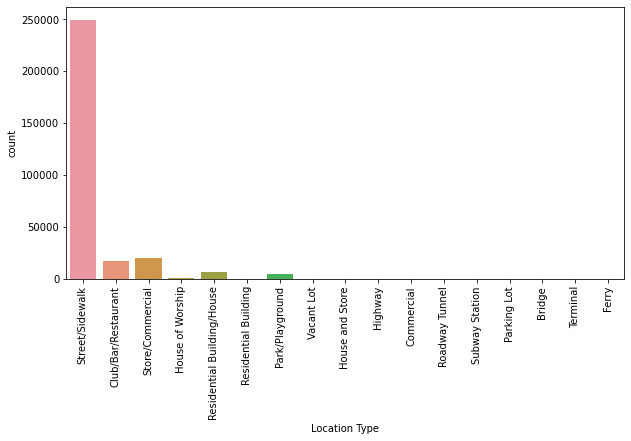

In [25]:
# Conclusion 5: The maximum complaints were regarding Street and Sidwalk which indicate that 
# there is a scope for improvement in strict measures on the road thus Traffic police can look into this matter
data['Location Type'].fillna(value='Street/Sidewalk',inplace=True)
plt.figure(figsize=(10,5))
plot_4 =sns.countplot(data['Location Type'])
plot_4.set_xticklabels(plot_4.get_xticklabels(), rotation=90)

In [26]:
# Conclusion 6: Major Complaint types and their count
df4= data['Complaint Type'].value_counts().head(10)
df4.nlargest().index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [27]:
df4


Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Blocked Driveway'),
 Text(1, 0, 'Illegal Parking'),
 Text(2, 0, 'Noise - Street/Sidewalk'),
 Text(3, 0, 'Noise - Commercial'),
 Text(4, 0, 'Derelict Vehicle')]

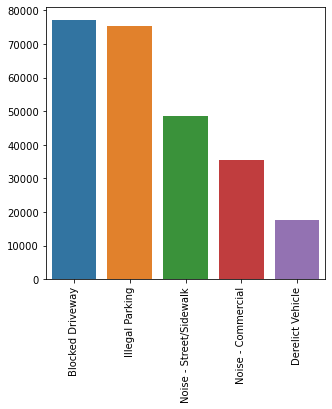

In [28]:
plt.figure(figsize=(5,5))
plot_5= sns.barplot(x=df4.nlargest().index, y= df4.nlargest().values)
plot_5.set_xticklabels(plot_5.get_xticklabels(), rotation=90)